# Предсказание временных рядов с помощью машинного обучения

Поработайте с данными sunspot_numbers.xlsx - это данные о ежемесячном количестве наблюдаемых пятен на солнце.

Разбейте данные на train и test (test - последние 15% данных)

Следующие пункты можете делать в любом удобном вам порядке.

1) Сделайте предсказание с помощью fbprophet и измерьте mse и mae предсказания на train и на test

2) Поработайте над созданием новых признаков (лаги, аггрегированные признаки и т.д.) и примените для предсказания линейную регрессию и какой-нибудь нелинейный алгоритм.

3) Сравните результаты алгоритмов из п.1) и п.2)

4) Сделайте предсказание с помощью модели Хольта-Уинтерса и/или попробуйте применить модели ARIMA/SARIMA для предсказания.

Какая модель получилась наилучшей?

5) Попробуйте скомбинировать наилучшие модели.

In [33]:
import pandas as pd

df = pd.read_excel("sunspot_numbers.xlsx")
df.head()

,Month,SunspotNumbers
0,1749-01,58.0
1,1749-02,62.6
2,1749-03,70.0
3,1749-04,55.7
4,1749-05,85.0


Populating the interactive namespace from numpy and matplotlib


C:\Users\elena\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


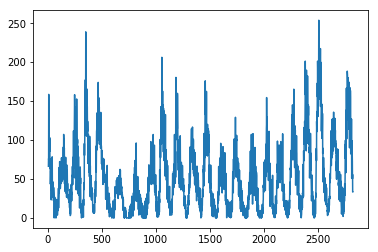

In [46]:
from matplotlib import pylab as plt
%pylab inline

plot(df.SunspotNumbers)

In [34]:
test_index = int(len(df)*0.85)
test_index

2397

In [35]:
df['Lag1'] = df.SunspotNumbers.shift(1)
df['Lag2'] = df.SunspotNumbers.shift(2)
df['Lag3'] = df.SunspotNumbers.shift(3)
df['Lag4'] = df.SunspotNumbers.shift(4)
df['Lag5'] = df.SunspotNumbers.shift(5)
df['Lag6'] = df.SunspotNumbers.shift(6)
df['Lag7'] = df.SunspotNumbers.shift(7)

df.head()

,Month,SunspotNumbers,Lag1,Lag2,Lag3,Lag4,Lag5,Lag6,Lag7
0,1749-01,58.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1749-02,62.6,58.0,NaN,NaN,NaN,NaN,NaN,NaN
2,1749-03,70.0,62.6,58.0,NaN,NaN,NaN,NaN,NaN
3,1749-04,55.7,70.0,62.6,58.0,NaN,NaN,NaN,NaN
4,1749-05,85.0,55.7,70.0,62.6,58.0,NaN,NaN,NaN


In [36]:
df.dropna(inplace=True)

In [37]:
df.head()

,Month,SunspotNumbers,Lag1,Lag2,Lag3,Lag4,Lag5,Lag6,Lag7
7,1749-08,66.3,94.8,83.5,85.0,55.7,70.0,62.6,58.0
8,1749-09,75.9,66.3,94.8,83.5,85.0,55.7,70.0,62.6
9,1749-10,75.5,75.9,66.3,94.8,83.5,85.0,55.7,70.0
10,1749-11,158.6,75.5,75.9,66.3,94.8,83.5,85.0,55.7
11,1749-12,85.2,158.6,75.5,75.9,66.3,94.8,83.5,85.0


In [39]:
y = df.SunspotNumbers
 
X = df[['Lag1','Lag2','Lag3','Lag4','Lag5','Lag6','Lag7']]

len(X), len(y)

(2813, 2813)

In [40]:
Xtrain = X.loc[:test_index]
ytrain = y.loc[:test_index]

Xtest = X.loc[test_index:]
ytest = y.loc[test_index:]

len(ytrain), len(ytest), len(Xtrain), len(Xtest)

(2391, 423, 2391, 423)

In [41]:
Xtrain.shape, len(ytrain)

((2391, 7), 2391)

In [42]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(Xtrain, ytrain)

prediction = lr.predict(Xtest)

In [43]:
from sklearn.metrics import mean_absolute_error, r2_score

mean_absolute_error(ytest, prediction), r2_score(ytest, prediction)

(13.612379038213279, 0.8945999114841314)

In [44]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100)
rf.fit(Xtrain, ytrain)

prediction2 = rf.predict(Xtest)

In [45]:
mean_absolute_error(ytest, prediction2), r2_score(ytest, prediction2)

(14.894248226950358, 0.8714638890121543)